In [131]:
# Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [132]:
# Function to scale performance metrics
def scaling(DTW_train, DTW_test):
    Max = max(np.max(DTW_train), np.max(DTW_test))
    Min = min(np.min(DTW_train),np.min(DTW_test))
    DTW_train = 19*(DTW_train - Min)/(Max - Min)
    DTW_test = 19*(DTW_test - Min)/(Max - Min)
    return DTW_train, DTW_test

In [133]:
# Function to evaluate separation degree
def score(DTW_train, DTW_test):
    samples_train = DTW_train.shape[1]
    samples_test = DTW_test.shape[1]
    score = 0
    for i in range(samples_train):
        for j in range(samples_test):
            score = score + ((DTW_train[0,i] - DTW_test[0,j])/(DTW_train[0,i] + DTW_test[0,j]))
           
    score = score/(samples_train*samples_test)
    return score
    

In [134]:
#Input files
filepath_train_bw = "Data/DTW_bw_AE_correct.csv"
filepath_test_bw = "Data/DTW_bw_AE_incorrect.csv"
filepath_train_with = "Data/DTW_with_AE_correct.csv"
filepath_test_with = "Data/DTW_with_AE_incorrect.csv"

#Number of examples
samples = 90

#Load train and test for in-between and within subject case
DTW_train_bw = np.loadtxt(filepath_train_bw, delimiter = ',')
DTW_test_bw = np.loadtxt(filepath_test_bw, delimiter = ',')
DTW_train_with = np.loadtxt(filepath_train_with, delimiter = ',')
DTW_test_with = np.loadtxt(filepath_test_with, delimiter = ',')

DTW_train_bw = DTW_train_bw.reshape(1,90)
DTW_test_bw = DTW_test_bw.reshape(1,90)
DTW_train_with = DTW_train_with.reshape(1,90)
DTW_test_with = DTW_test_with.reshape(1,90)

#Print shape of performance metrics
print(DTW_train_bw.shape)
print(DTW_test_bw.shape)
print(DTW_train_with.shape)
print(DTW_train_with.shape)


(1, 90)
(1, 90)
(1, 90)
(1, 90)


In [135]:
#Scale and evaluate separation degree
DTW_train_bw, DTW_test_bw = scaling(DTW_train_bw, DTW_test_bw)
DTW_train_with, DTW_test_with = scaling(DTW_train_with, DTW_test_with)
score_bw = score(DTW_train_bw, DTW_test_bw)
score_with = score(DTW_train_with, DTW_test_with)
print("Separation degree of between case: " + str(score_bw))
print("Separation degree of within case : " + str(score_with))
samples_Arr = np.arange(1,samples+1).reshape(1,samples)

Separation degree of between case: -0.44818479383414456
Separation degree of within case : -0.7474427000534409


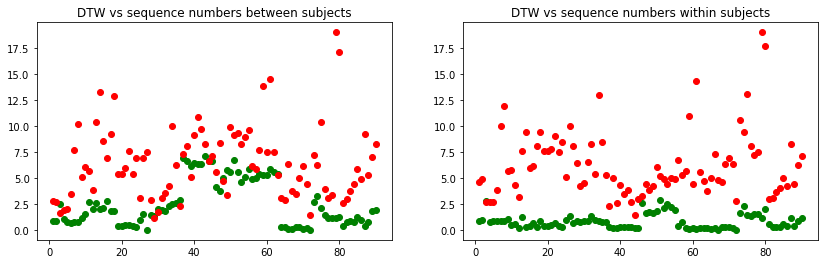

In [136]:
#Plot DTW vs sequence numbers
%matplotlib inline
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.plot(samples_Arr,DTW_train_bw,'go')
plt.plot(samples_Arr,DTW_test_bw,'ro')
plt.title('DTW vs sequence numbers between subjects')
plt.subplot(1,2,2)
plt.plot(samples_Arr,DTW_train_with,'go')
plt.plot(samples_Arr,DTW_test_with,'ro')
plt.title('DTW vs sequence numbers within subjects')
plt.show()
